<a href="https://colab.research.google.com/github/bimal-bp/-AIRLINE-PASSENGER-REFERRAL-PREDICTION./blob/ML_MODELS/AIRLINE_PASSENGER_REFERRAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/data_airline_reviews.xlsx')

In [79]:
df.shape

(131895, 17)

In [80]:
#Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importing various machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm

# importing required classes for model selection.
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# importing model evaluation metrics.
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [81]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')



*   airline: Name of the airline.
*   overall: Overall point is given to the trip between 1 to 10.

*   author: Author of the trip

*   reviewdate: Date of the Review

*   customer review: Review of the customers in free text format

*   aircraft: Type of the aircraft
*   travellertype: Type of traveler (e.g. business, leisure)


*   cabin: Cabin at the flight


*   date flown: Flight date


*   seatcomfort: Rated between 1-5

*   cabin service: Rated between 1-5

*   foodbev: Rated between 1-5

*   entertainment: Rated between 1-5
*   groundservice: Rated between 1-5


*   valueformoney: Rated between 1-5

*   recommended: Binary, target variable


In [83]:
df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [84]:
df.duplicated().sum()

70711

In [85]:
perof_mv=round((df.isnull().sum()/len(df)*100),3)
sorting = perof_mv.sort_values(ascending=False)
sorting

aircraft           85.050
ground_service     70.160
date_flown         69.951
route              69.881
traveller_type     69.859
entertainment      66.494
food_bev           60.114
seat_comfort       53.993
cabin_service      53.967
cabin              52.005
value_for_money    51.496
overall            51.464
recommended        51.143
customer_review    50.000
review_date        50.000
author             50.000
airline            50.000
dtype: float64

In [86]:
df.drop(df[df['recommended'].isnull()].index,inplace=True)

In [87]:
df.isnull().sum()

airline                0
overall             1910
author                 0
review_date            0
customer_review        0
aircraft           44723
traveller_type     24686
cabin               1138
route              24715
date_flown         24807
seat_comfort        3759
cabin_service       3725
food_bev           11832
entertainment      20247
ground_service     25082
value_for_money      465
recommended            0
dtype: int64

In [88]:
missing_percentages = round((df.isnull().sum() / len(df) * 100), 3)
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
sorted_missing_percentages

aircraft           69.403
ground_service     38.923
date_flown         38.496
route              38.354
traveller_type     38.309
entertainment      31.420
food_bev           18.361
seat_comfort        5.833
cabin_service       5.781
overall             2.964
cabin               1.766
value_for_money     0.722
airline             0.000
customer_review     0.000
review_date         0.000
author              0.000
recommended         0.000
dtype: float64

In [89]:
df.nunique()

airline               81
overall               10
author             43289
review_date         3010
customer_review    59750
aircraft            2088
traveller_type         4
cabin                  4
route              24548
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

* There are a large number of aircraft. The percentage of null values in them is also high.
As a result, 'aircraft' column can be removed.
* The percentage of null values in date flown is also high. We can remove this column to reduce the number of null values because we will be focusing more on the reviews and their subset scores.
* The column 'author' has no relevance to the prediction. As a result, this column can also be removed.

In [90]:
df.drop(['author','aircraft','date_flown'] , axis = 1 , inplace = True)

In [91]:
missing_percentages = round((df.isnull().sum() / len(df) * 100), 3)
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
sorted_missing_percentages

ground_service     38.923
route              38.354
traveller_type     38.309
entertainment      31.420
food_bev           18.361
seat_comfort        5.833
cabin_service       5.781
overall             2.964
cabin               1.766
value_for_money     0.722
airline             0.000
review_date         0.000
customer_review     0.000
recommended         0.000
dtype: float64

In [92]:
# Dropping the null value rows
df.dropna(axis=0,how='any',inplace = True)

In [93]:
df.head(5)

,airline,overall,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,1.0,1.0,1.0,1.0,1.0,1.0,no


In [94]:
df.duplicated().sum()

1744

In [95]:
df.drop_duplicates(keep='first', inplace = True)

In [96]:
missing_percentages = round((df.isnull().sum() / len(df) * 100), 3)
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)
sorted_missing_percentages

airline            0.0
overall            0.0
review_date        0.0
customer_review    0.0
traveller_type     0.0
cabin              0.0
route              0.0
seat_comfort       0.0
cabin_service      0.0
food_bev           0.0
entertainment      0.0
ground_service     0.0
value_for_money    0.0
recommended        0.0
dtype: float64

In [97]:
df.shape

(22826, 14)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22826 entries, 1 to 131712
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          22826 non-null  object 
 1   overall          22826 non-null  float64
 2   review_date      22826 non-null  object 
 3   customer_review  22826 non-null  object 
 4   traveller_type   22826 non-null  object 
 5   cabin            22826 non-null  object 
 6   route            22826 non-null  object 
 7   seat_comfort     22826 non-null  float64
 8   cabin_service    22826 non-null  float64
 9   food_bev         22826 non-null  float64
 10  entertainment    22826 non-null  float64
 11  ground_service   22826 non-null  float64
 12  value_for_money  22826 non-null  float64
 13  recommended      22826 non-null  object 
dtypes: float64(7), object(7)
memory usage: 2.6+ MB


In [99]:
df.head(3)

,airline,overall,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no


In [100]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['recommended']=le.fit_transform(df['recommended'])

In [101]:
df['recommended'].value_counts()

0    11760
1    11066
Name: recommended, dtype: int64

In [102]:
df.head(3)

,airline,overall,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Turkish Airlines,2.0,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,0
5,Turkish Airlines,3.0,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,0


 **EDA**

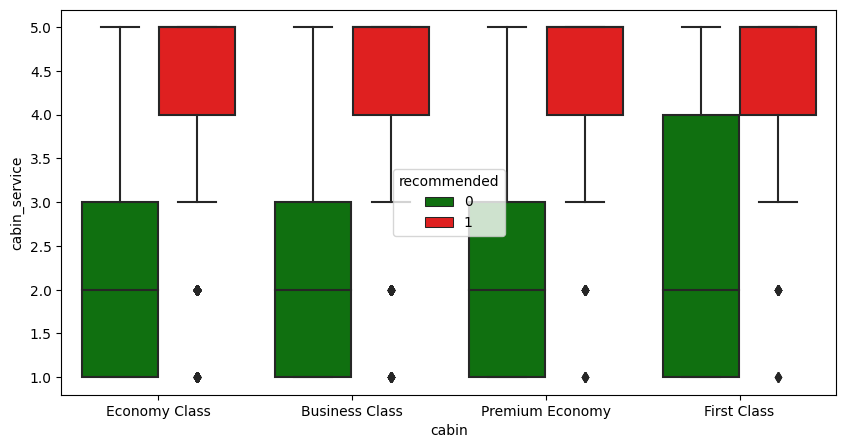

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cabin type and cabin service ratings
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cabin', y='cabin_service', hue='recommended', palette=['green', 'red'])
plt.show()


* The overall rating for the 'Economy class' cabin type is favourable. As a result, it is recommended.
* From above its clear that, Both Business and Premium Economy Class are not recommended.

In [104]:
import pandas as pd

# Create a crosstab between 'cabin' and 'recommended'
cross_tab = pd.crosstab(df['cabin'], df['recommended'])

# Print the crosstab
print(cross_tab)


recommended         0     1
cabin                      
Business Class   1459  3087
Economy Class    9477  6909
First Class       273   426
Premium Economy   551   644


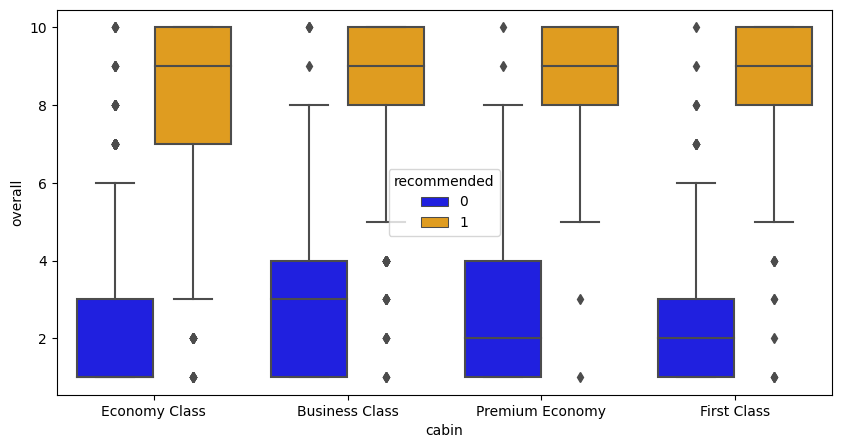

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='cabin', y='overall', hue='recommended', palette=['blue', 'orange'])
plt.show()

- The overall rating for the 'Economy class' cabin type is favourable. As a result, it is recommended.

- From above its clear that, Both Business and Premium Economy Class are not recommended.

<Axes: xlabel='cabin', ylabel='value_for_money'>

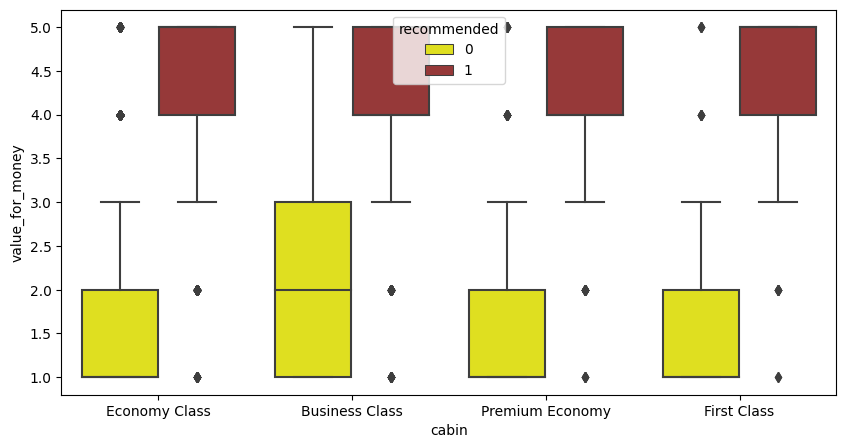

In [106]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='cabin',y='value_for_money',hue='recommended',palette=['yellow','brown'])

* Only those people who have given the 'value for money' rating of 4 or higher have been recommended to others.
* It is clear from the above that business class travel is not recommended because it is not worth of money

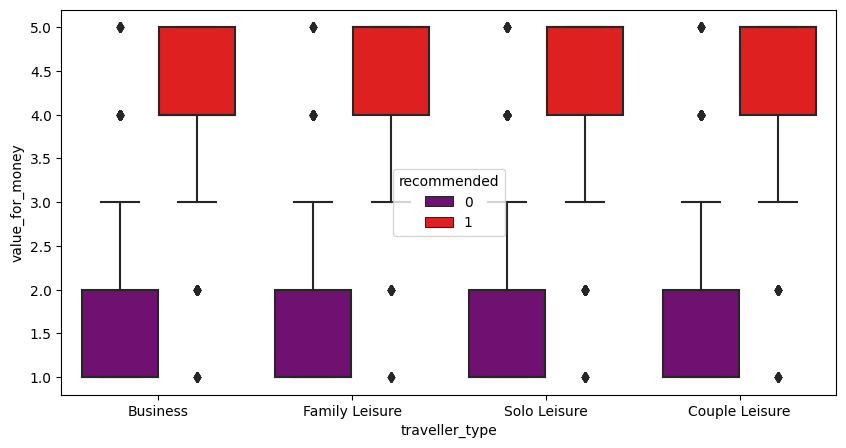

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='traveller_type', y='value_for_money', hue='recommended', palette=['purple', 'red'])
plt.show()


* As we can see from the graph above, all type of traveller type is highly advised if the value for money rating is greater than 4.
* If the rating of value of money is below 2, all the traveller type is not recommended.

In [108]:
df['overall'].unique()

array([ 7.,  2.,  3., 10.,  1.,  6.,  8.,  5.,  4.,  9.])

Since the "overall" ratings are out of 10, and the other ratings are scaled from 0 to 5, let's divide the "overall" ratings by 2 to make comparisons and visualisations easier.

In [109]:
df['overall']=df['overall']/2

In [110]:
# Grouping the various ratings columns to one list
review_columns = ['overall','seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money']

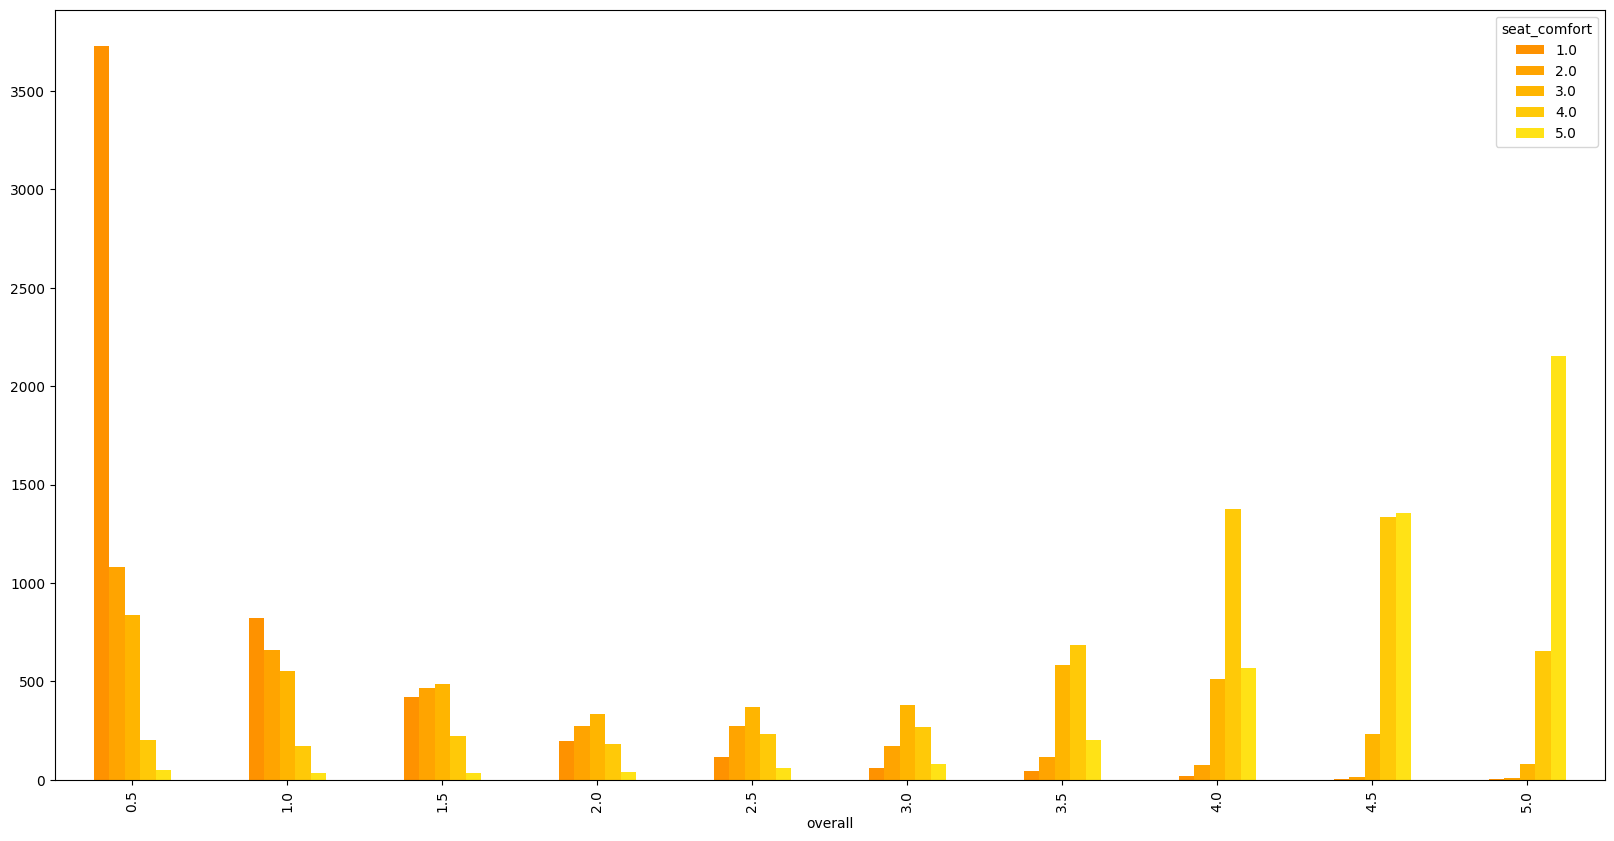

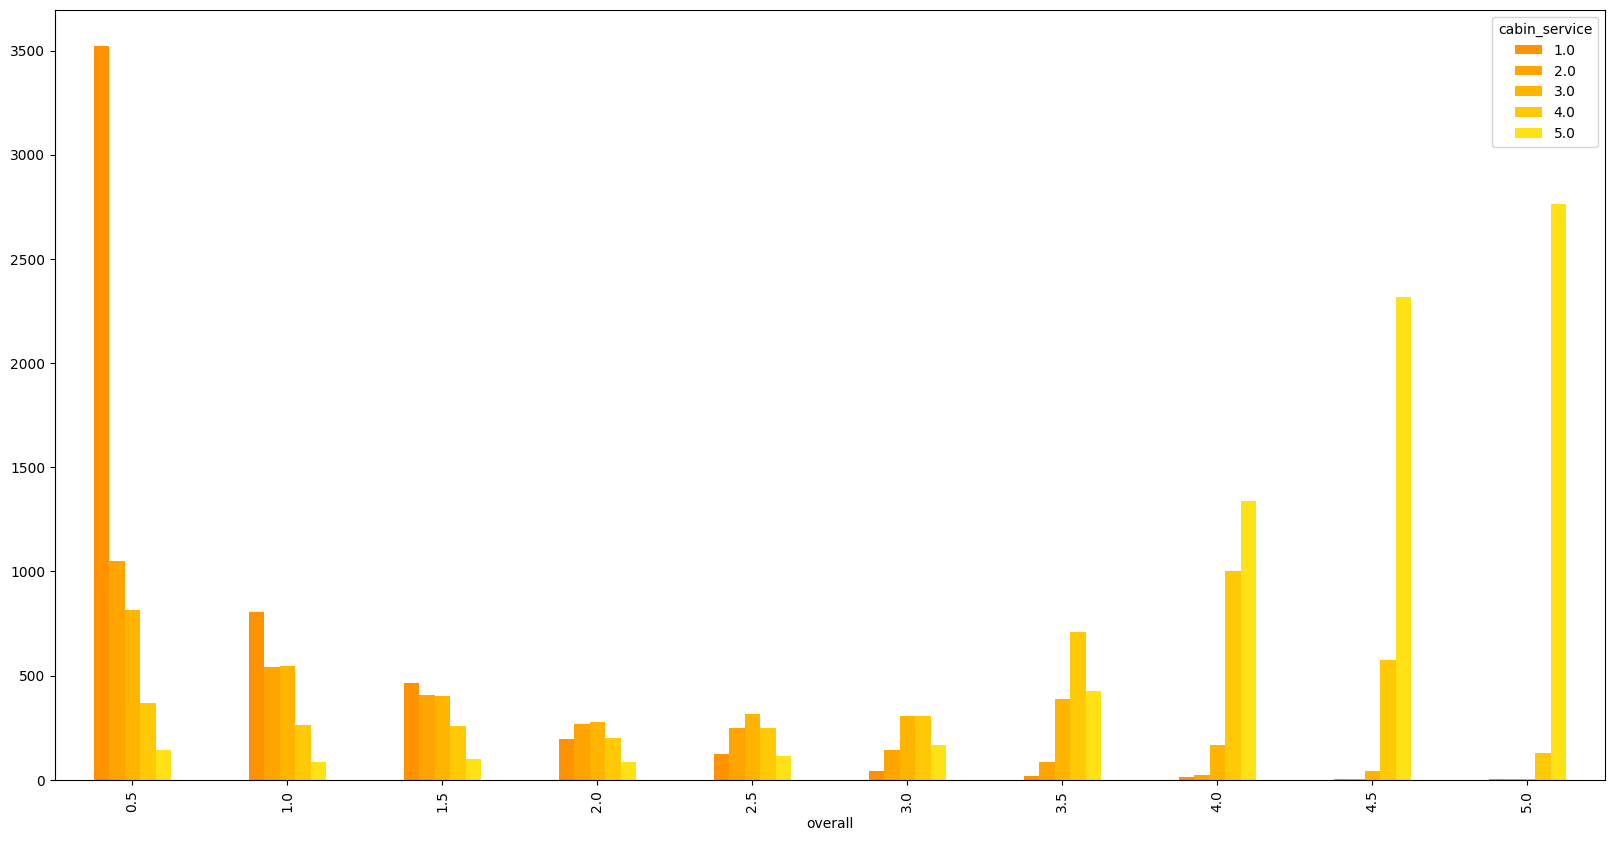

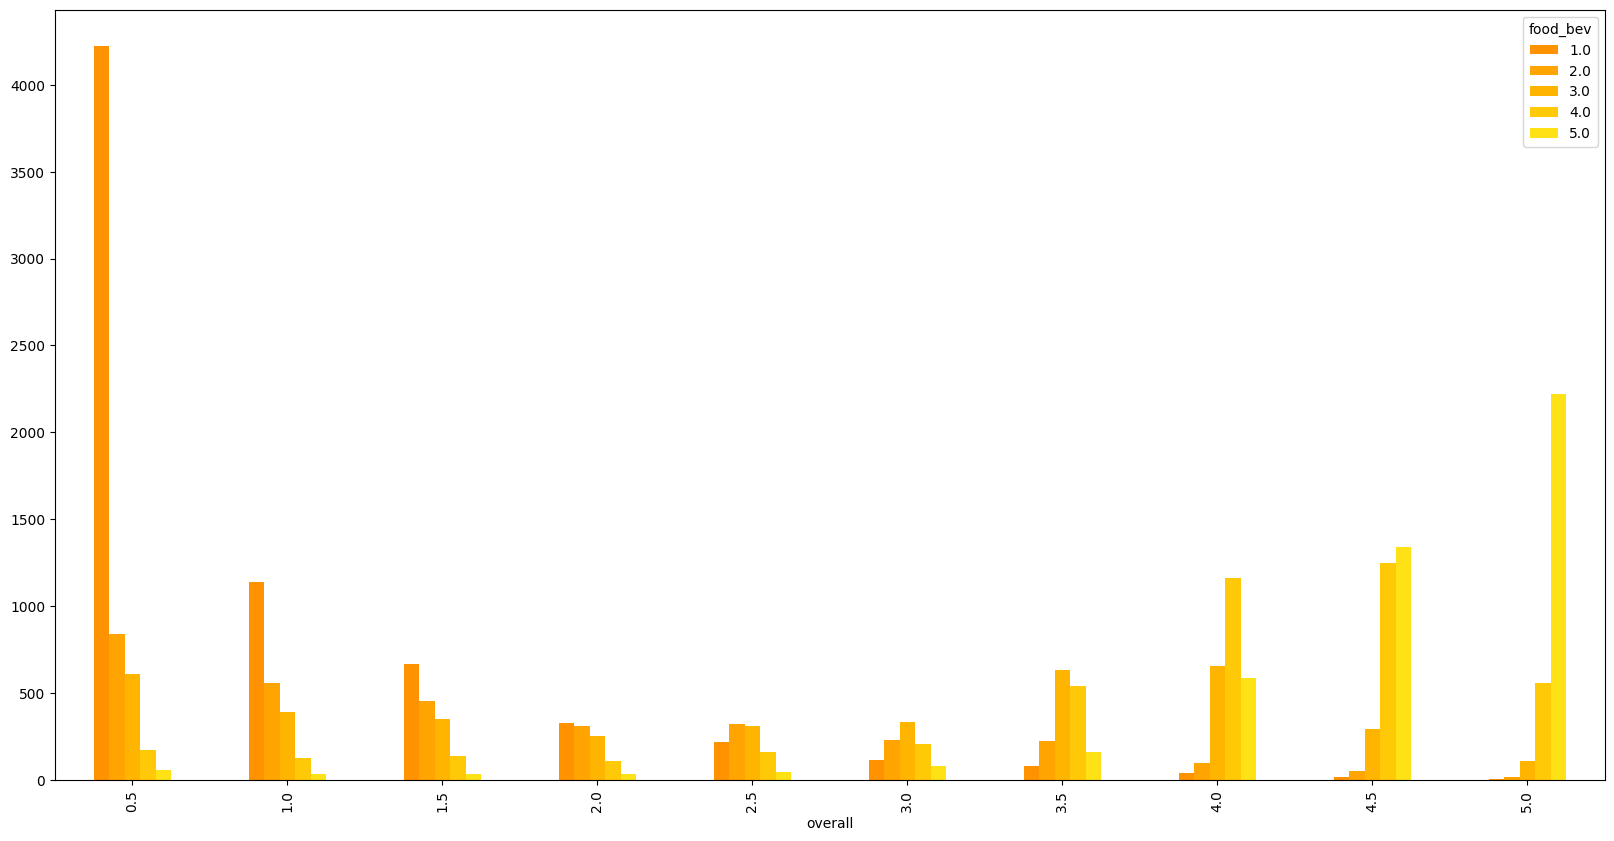

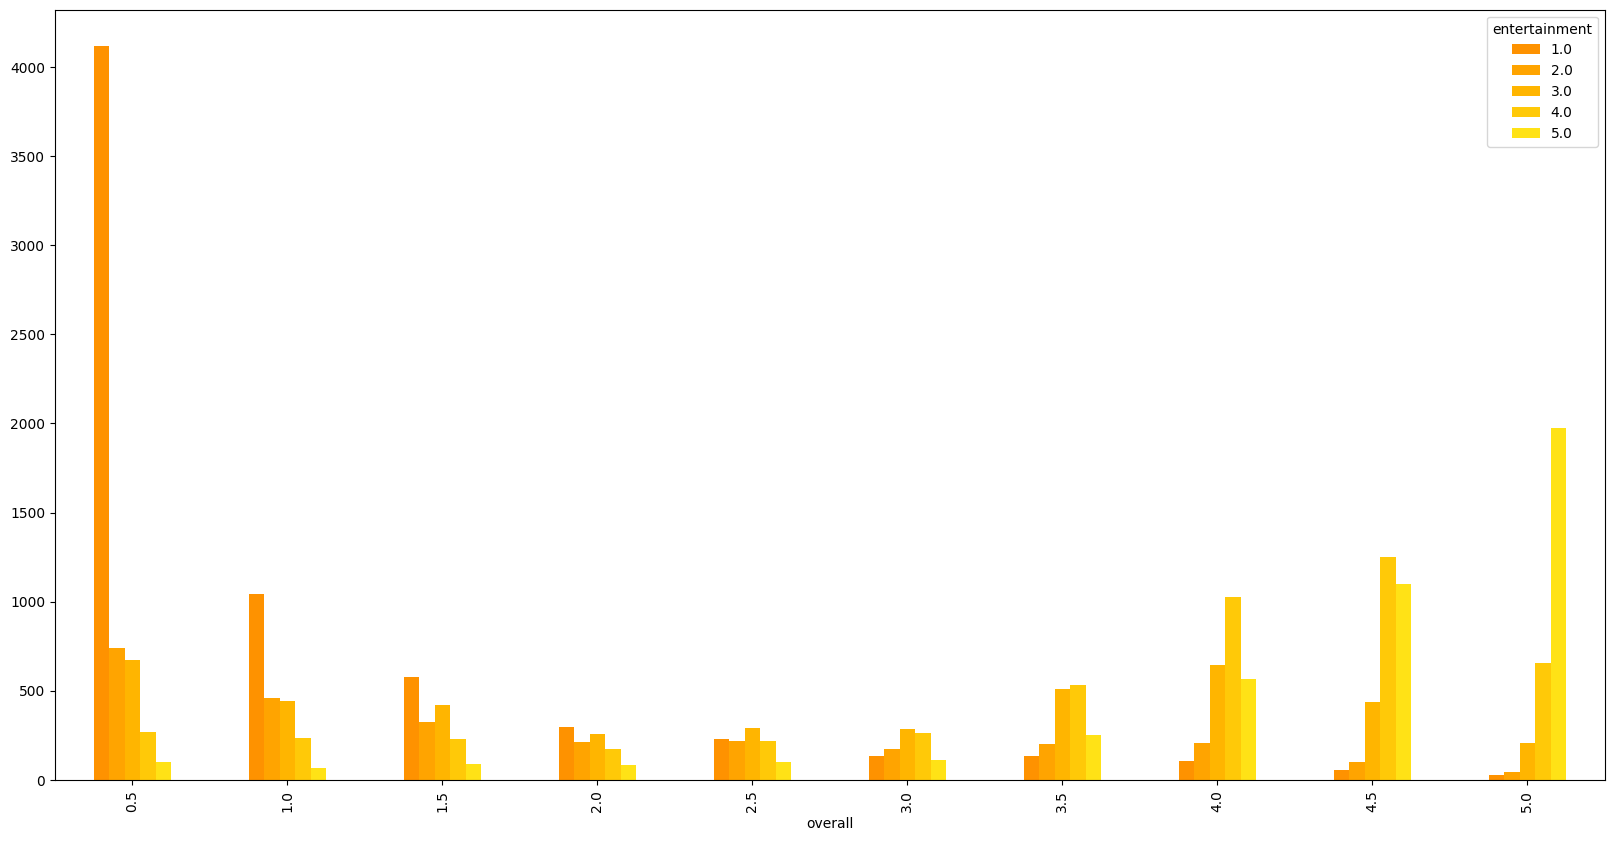

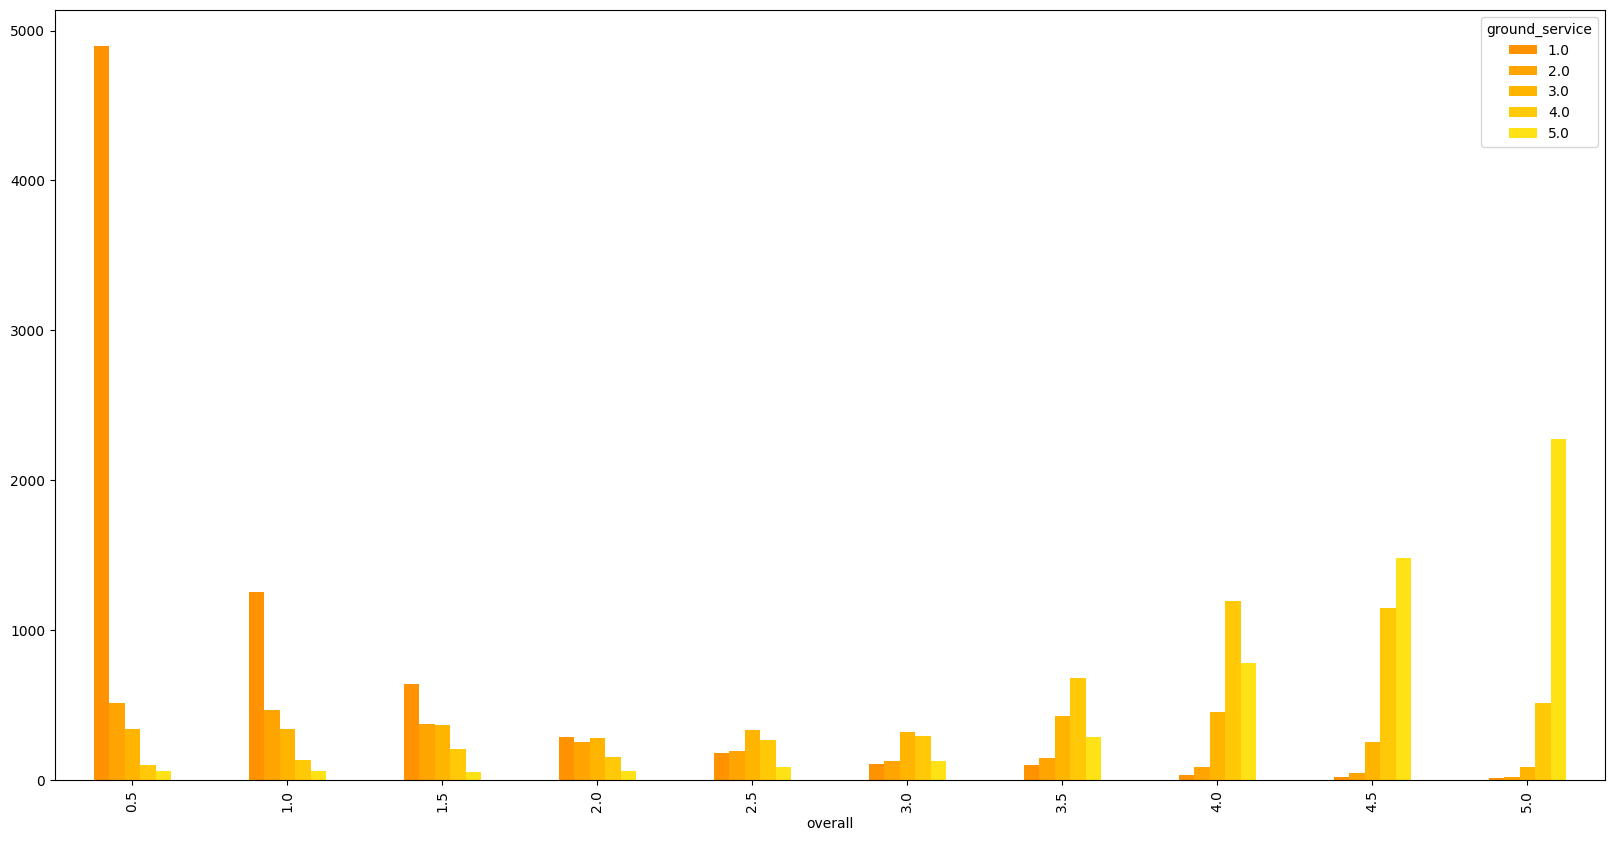

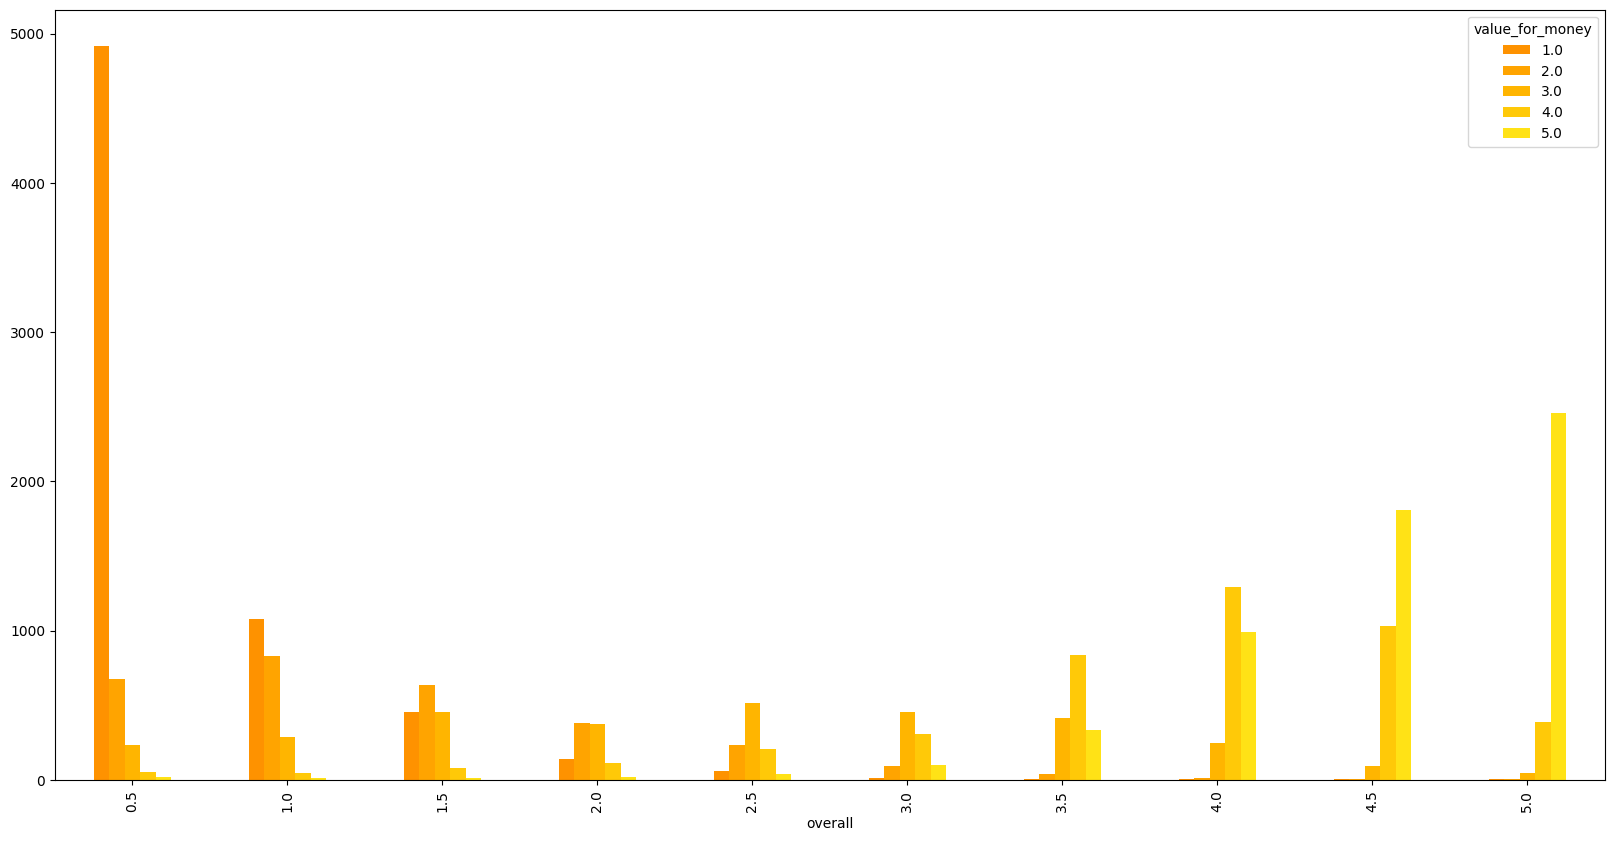

In [111]:

# Grouping the various ratings columns to one list
review_columns = ['overall','seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money']

for i in review_columns[1:]:
  x=df.groupby([df['overall']])
  x[i].value_counts().unstack().plot(kind='bar',figsize=(20,10))

As we can see above, the overall ratings column is a direct result of all of the other review columns. It means that the overall ratings increase with the increase in the other ratings.*

In [112]:
df['recommended'].value_counts()

0    11760
1    11066
Name: recommended, dtype: int64

* According to the graph above, even though not recommended is higher, the difference between recommended and not recommended is not significantly higher.
* Over 11000 people have recommended it to others.

<Axes: xlabel='traveller_type', ylabel='count'>

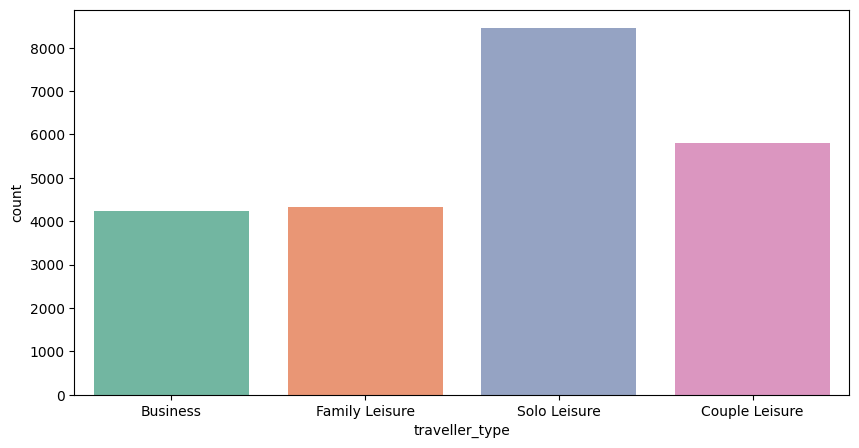

In [113]:
sns.set_palette('Set2')
plt.figure(figsize=(10,5))
sns.countplot(x = 'traveller_type', data =df)

* The majority of reviewers are solo leisure travellers, followed by couple leisure travellers. Both business and leisure travellers have few but equal reviews.
* *As a result, the majority of travellers are Solo Leisure.*

<Axes: ylabel='cabin'>

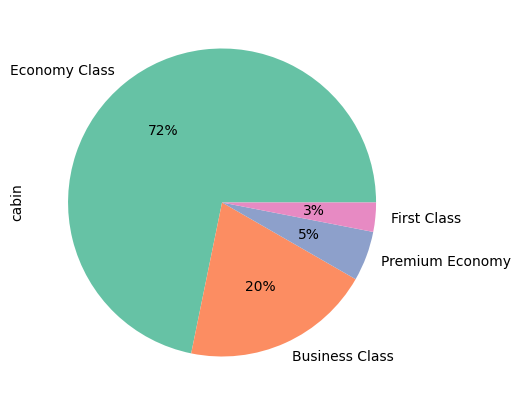

In [114]:
(df['cabin'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(10,5)))

Text(0.5, 1.0, 'Airline Count Distribution')

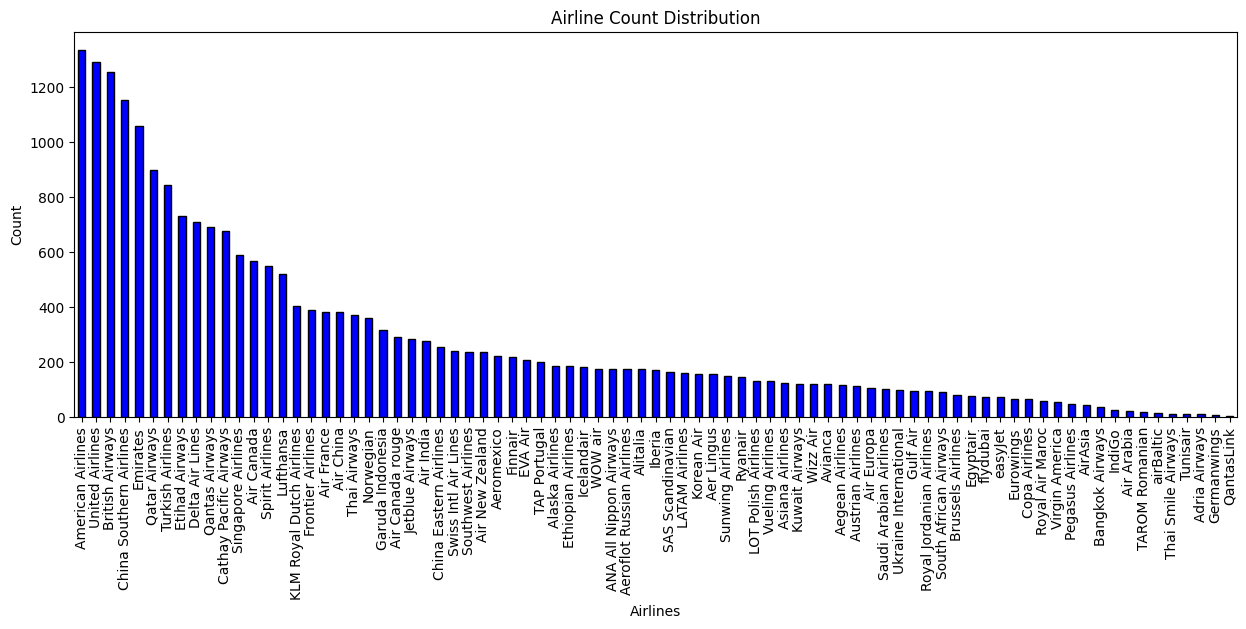

In [115]:
#Checking the reviews distribution with respect to the airlines
plt.figure(figsize=(15,5))
df['airline'].value_counts().plot(kind="bar", align='center',color = 'blue',edgecolor = 'black')
plt.xlabel("Airlines")
plt.ylabel("Count")
plt.title("Airline Count Distribution")

* American Airlines get most reviews followed by united Airlines and British Airways.
* Qantaslink get least reviews followed by Germanwings and Andria Airways.

Text(0.5, 1.0, 'Airline Count Distribution')

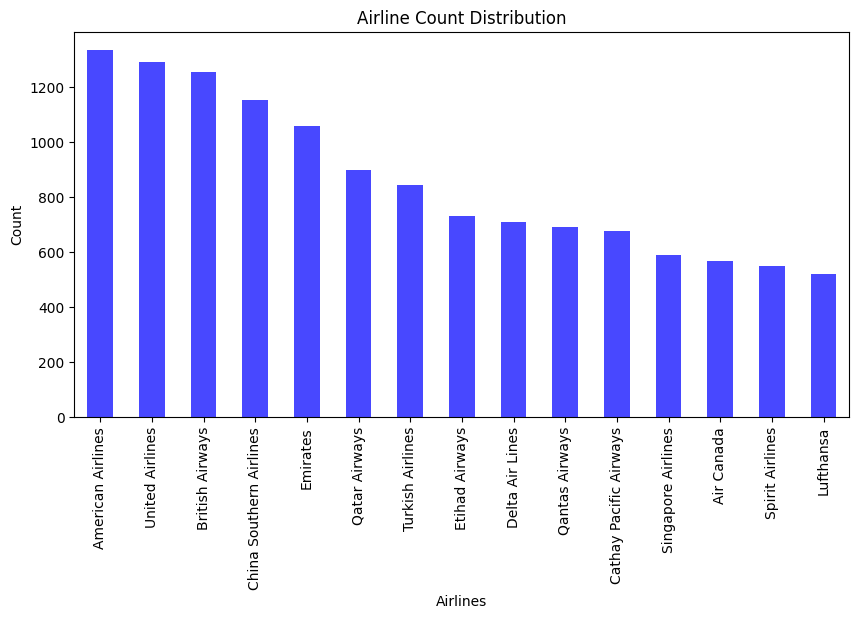

In [116]:
# Checking the reviews distribution with respect to the top 10 airlines with most number of reviews
plt.figure(figsize=(10,5))
sns.set_palette("bwr")
df['airline'].value_counts().nlargest(15).plot(kind="bar")
plt.xlabel("Airlines")
plt.ylabel("Count")
plt.title("Airline Count Distribution")

Text(0.5, 1.0, 'Traveller Type Count Distribution')

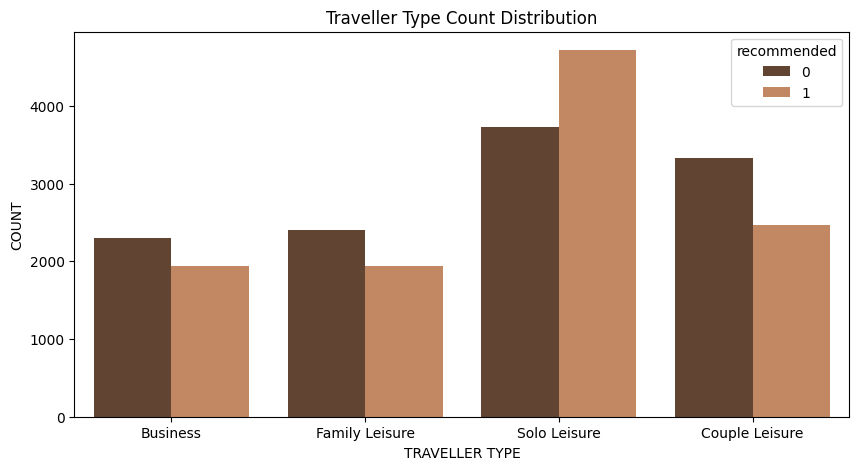

In [117]:
# Traveller Type Distribution
plt.figure(figsize=(10,5))
sns.countplot(x="traveller_type", hue="recommended", data=df, palette="copper")
plt.xlabel("TRAVELLER TYPE")
plt.ylabel("COUNT")
plt.xticks(rotation=0)
plt.title("Traveller Type Count Distribution")

Text(0.5, 1.0, 'Cabin Type Count Distribution')

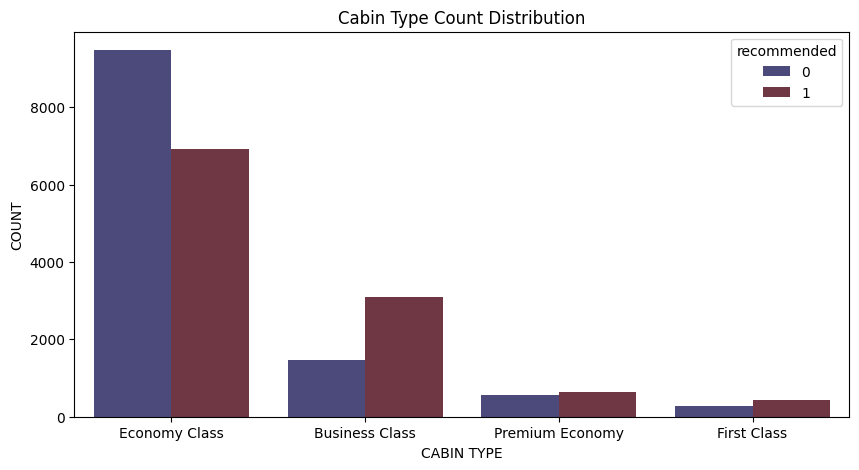

In [118]:
# Cabin Type Count Distribution
plt.figure(figsize=(10,5))
sns.countplot(x="cabin", hue="recommended", data=df, palette="icefire")
plt.xlabel("CABIN TYPE")
plt.ylabel("COUNT")
plt.xticks(rotation=0)
plt.title("Cabin Type Count Distribution")

<Axes: xlabel='overall', ylabel='Density'>

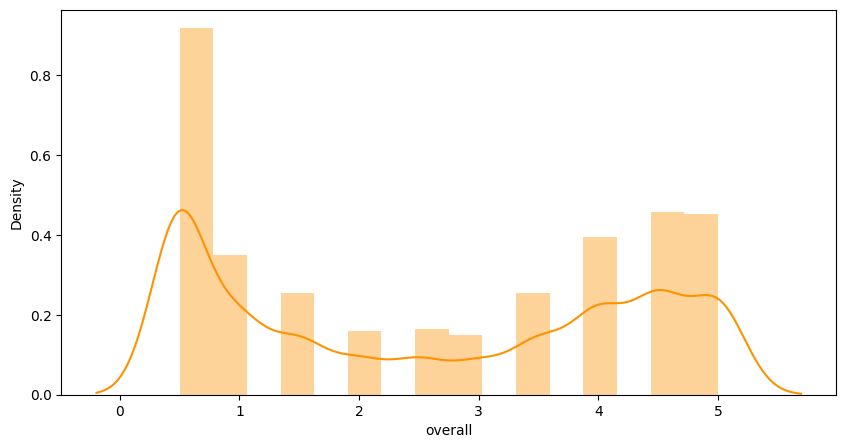

In [119]:
# Checking the density of the overall reviews
plt.figure(figsize=(10,5))
sns.set_palette("Wistia_r")
sns.distplot(df['overall'])

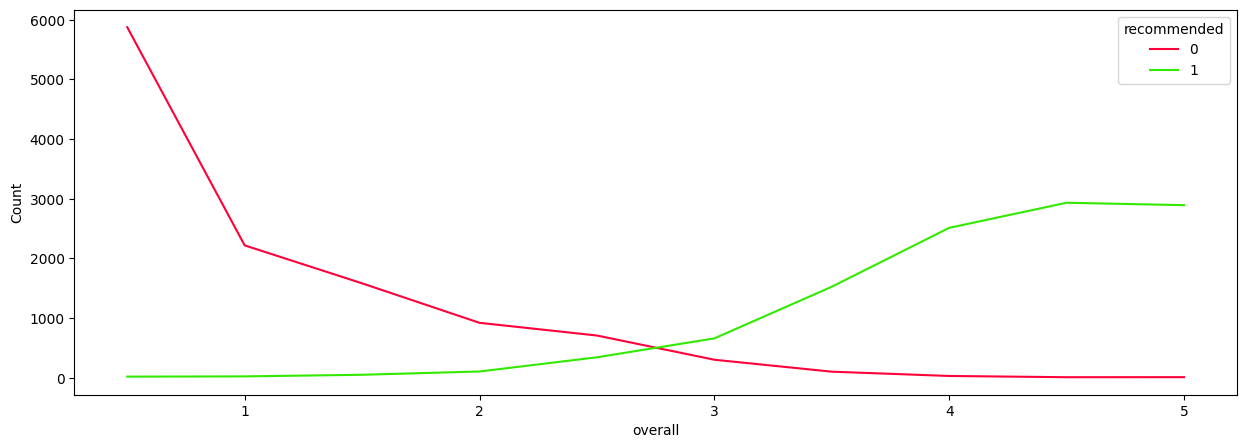

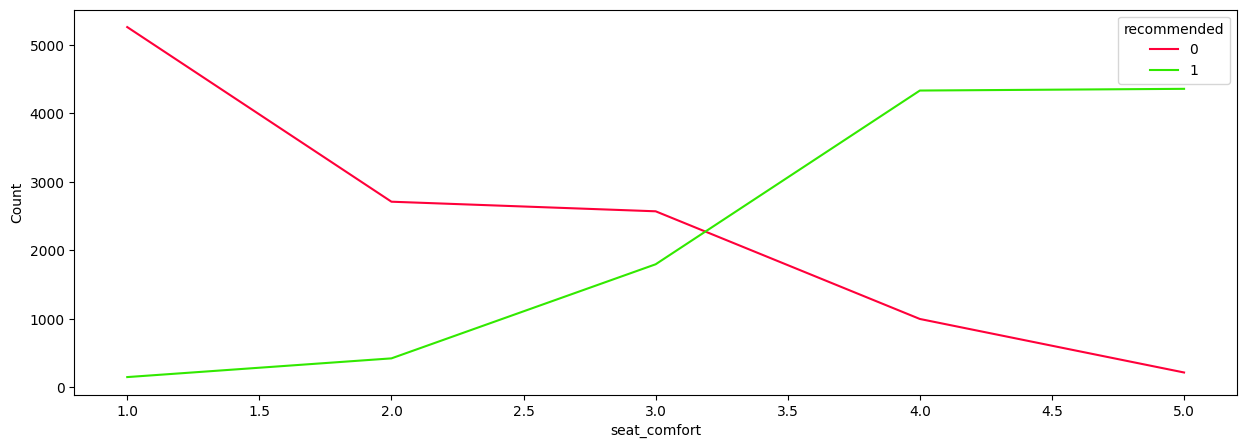

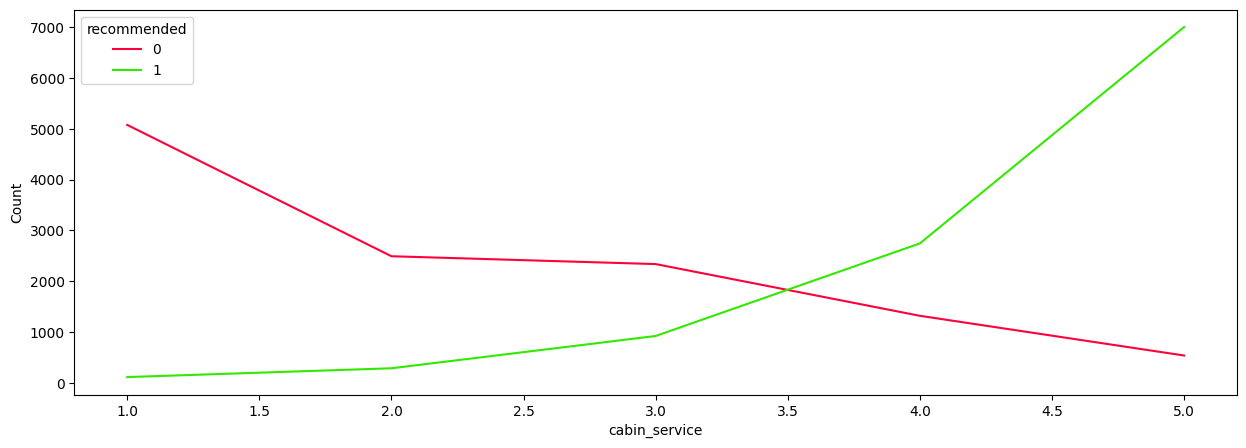

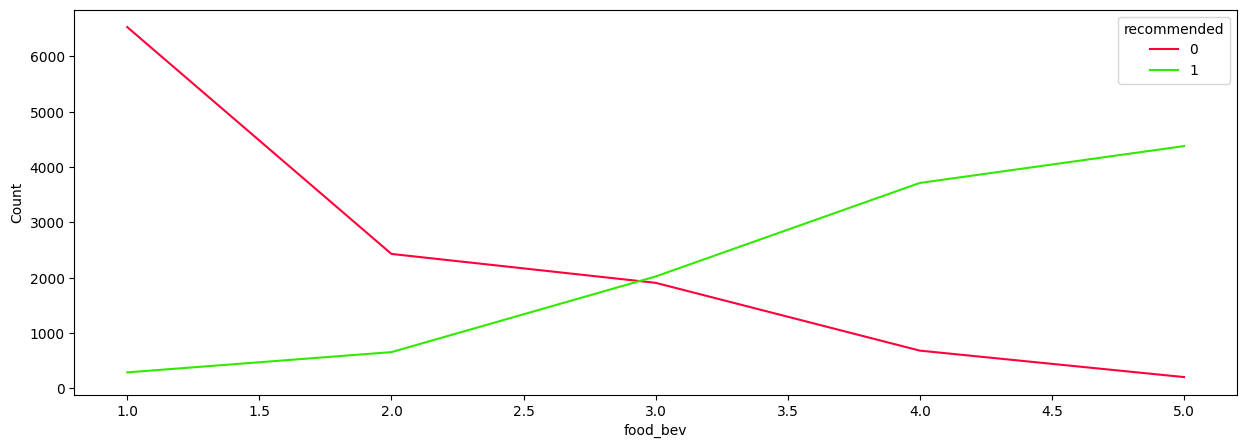

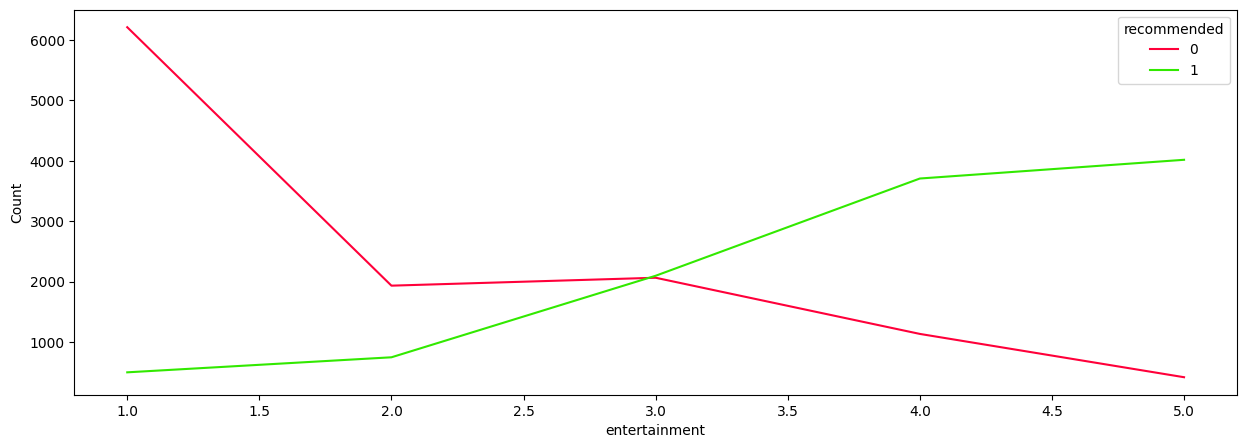

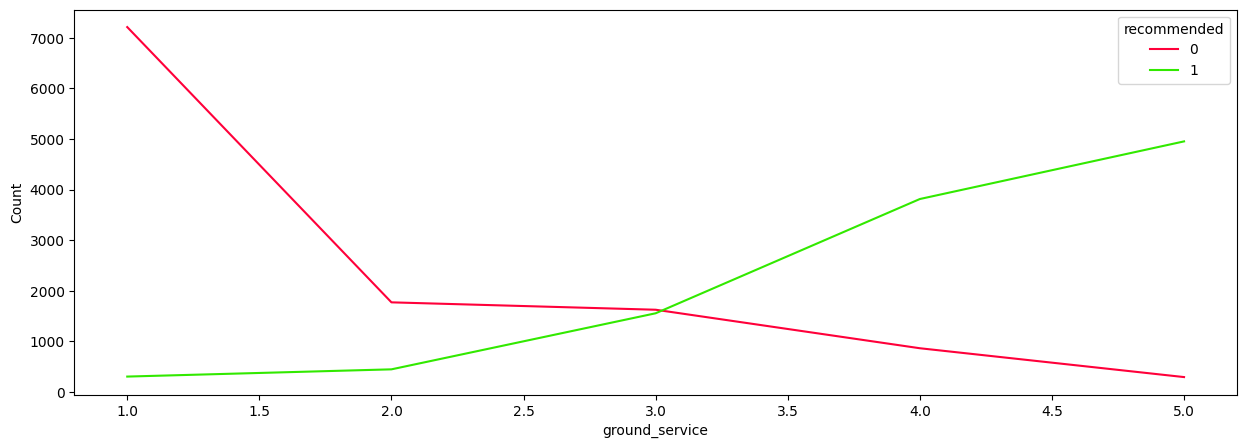

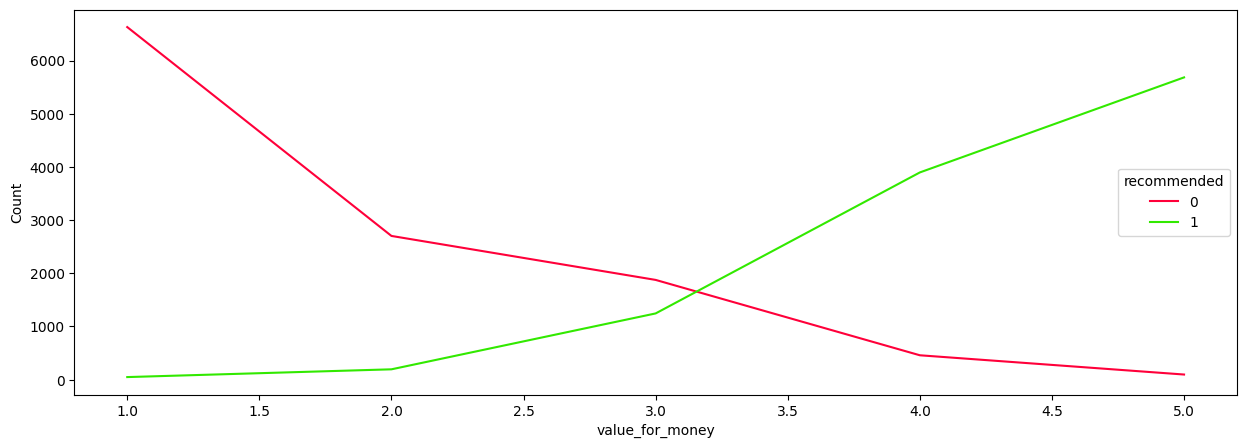

In [120]:
# Understanding the relationship of the various kinds of ratings with the overall ratings using a loop
for i in review_columns:
  count_rec = df.groupby([i,'recommended'])[['recommended']].count()
  count_rec.columns = ['Count']
  count_rec = count_rec.reset_index()
  plt.figure(figsize=(15,5))
  sns.lineplot(x=i, y='Count', hue='recommended', data=count_rec ,palette='prism_r')

The above plot shows the direct dependency of all type of ratings and the recommendation status. As the overall rating increases, there's more chance of recommendation. As the overall rating decreases decrease, there's less chance of recommendations.

NLP for User Reviews/ Sentiment Analysis:

In [121]:
#Install VaderSentiment package for sentiment analysis:
!pip install VaderSentiment

In [122]:
# Importing SentimentIntensityAnalyzer class
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [123]:
def sentiment_score(sentence):
  sid_obj=SentimentIntensityAnalyzer()
  sentiment_dict=sid_obj.polarity_scores(sentence)
  return  sentiment_dict['compound']

In [124]:
df['numreci_review']=df['customer_review'].apply(sentiment_score)

In [125]:
df['numreci_review']

1         0.9386
3         0.2732
5        -0.9192
7         0.9718
9        -0.7599
           ...  
131696   -0.9800
131698   -0.9246
131702    0.9543
131704   -0.9365
131712   -0.9872
Name: numreci_review, Length: 22826, dtype: float64

In [126]:
df.iloc[23,:]['customer_review']

'âœ… Trip Verified | Atlanta to Amman via Istanbul. Beside being one of the filthiest airport bathrooms and cheap of course for not making it easy to use the Wi-Fi, they make us wait 5 more hours in the transit just because they can fill up the plane by merging another plane for people who are going to Amman without giving us any notice! And after waiting hours now to check-in online, now they saying check-in at the counter. Bad food on the plane, bad select of movies and entertainments and of course bad customer service in the airport.'

In [127]:
df.iloc[23,:]['numreci_review']

-0.8986

In [128]:
df['overall_sentiment']=np.where(df['numreci_review']>= 0.5,"posetive",np.where(df['numreci_review']<=-0.5,"negative","neutral"))

<Axes: xlabel='overall_sentiment', ylabel='count'>

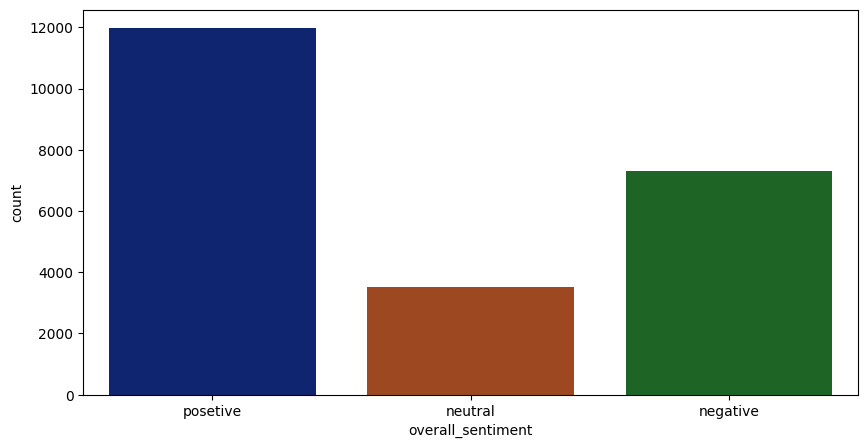

In [129]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'overall_sentiment', data = df, palette="dark")

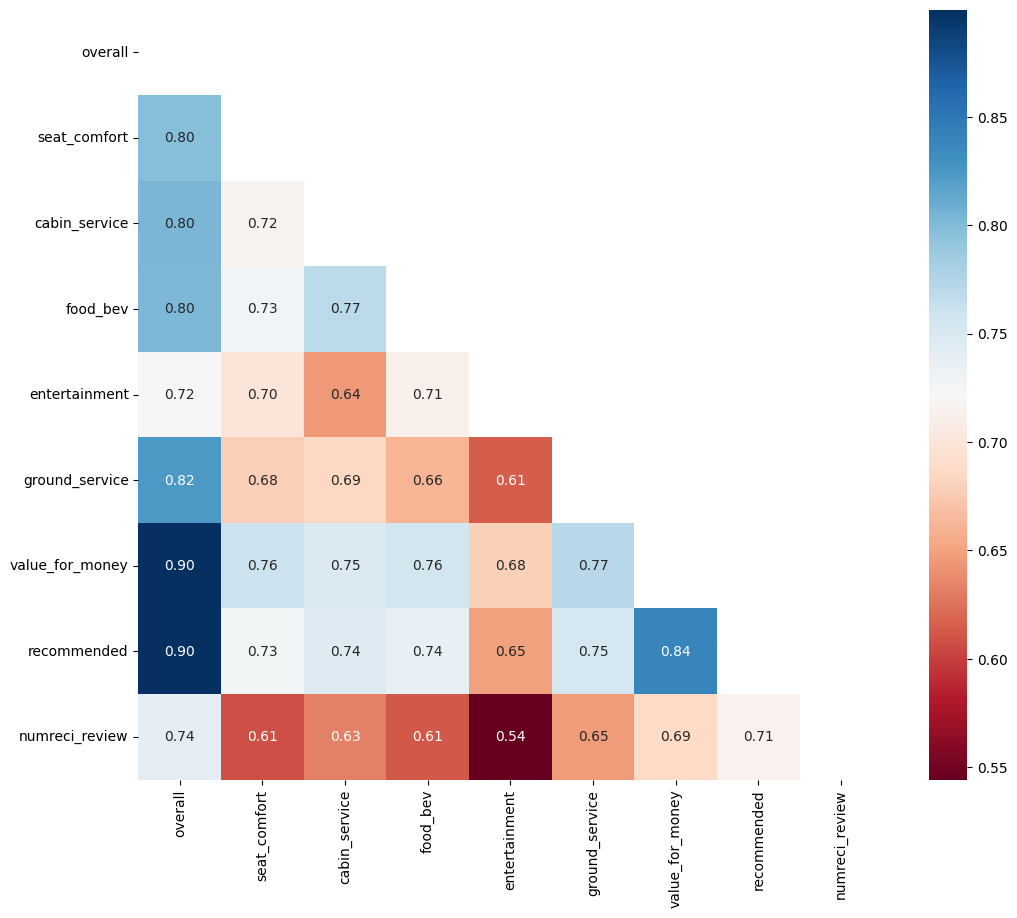

In [130]:
#Heatmap with correlation details
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 10))
corr_matrix = df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu', fmt=".2f")

plt.show()


In [131]:
df.drop(["customer_review","review_date",'route','overall_sentiment'],axis = 1,inplace = True)

In [132]:
categorical_columns =['airline','cabin','traveller_type']

In [133]:
df= pd.get_dummies(df,columns=categorical_columns , drop_first = False)

# MODEL IMPLEMENTATION:

In [134]:
airline_df=df.copy()

In [135]:
# Create the independent variable data
X = airline_df.drop(['recommended'],axis=1)


# Create the dependent variable data
y = airline_df['recommended']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [137]:
#Checking the test and train sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18260, 97)
(18260,)
(4566, 97)
(4566,)


In [138]:
# Declaring a dataset for storing the evaluation metrics for each of the models
column_names = ["MODEL NAME", "ACCURACY", "RECALL","PRECISION","F1-SCORE","ROC AUC SCORE"]
metrics_df = pd.DataFrame(columns = column_names)

In [139]:
#creating function for storing evaluation metrices
def add_metrics_details(model_name,y_test,y_pred,df):
  df = df.append({'MODEL NAME': model_name,
                  'ACCURACY':accuracy_score(y_test, y_pred),
                  'RECALL': recall_score(y_test, y_pred),
                  'PRECISION':precision_score(y_test, y_pred),
                  'F1-SCORE':f1_score(y_test, y_pred,)
                  ,'ROC AUC SCORE':roc_auc_score(y_test, y_pred)
                  }
                  ,ignore_index=True)
  return df

In [140]:
# defining logistic regression
lr= LogisticRegression(max_iter=300)
# fit the train model
lr.fit(X_train, y_train)
# logistic regression score
score=lr.score(X_test,y_test)
print(f'Logistic regression score : {score}')

Logistic regression score : 0.9564169951817784


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2378
           1       0.95      0.96      0.95      2188

    accuracy                           0.96      4566
   macro avg       0.96      0.96      0.96      4566
weighted avg       0.96      0.96      0.96      4566

Accuracy of the Model: 95.64169951817783%



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')

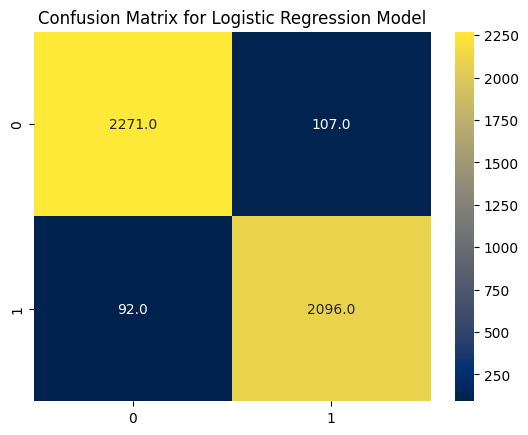

In [141]:
#Evaluation of the logistic regression model
predicted = lr.predict(X_test)
# printing precision, Recall, f1-score
print(classification_report(y_test, predicted))
# Confusion matrix
cm = metrics.confusion_matrix( y_test,predicted)
# Printing Accuracy of the model
print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
# Plotting Confusion matrix Heatmap using sns
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cividis")
plt.title("Confusion Matrix for Logistic Regression Model")


In [142]:
# Using function to add the result in metrics_df
metrics_df=add_metrics_details("Logistic Regression",y_test,predicted,metrics_df)

In [143]:
# Defining Decision Tree
dtc =DecisionTreeClassifier()
# Fitting the train model
dtc.fit(X_train,y_train)
# Decision tree Score
score=dtc.score(X_test,y_test)
print(f'Decision Tree score : {score}')

Decision Tree score : 0.9371441086289969


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2378
           1       0.95      0.96      0.95      2188

    accuracy                           0.96      4566
   macro avg       0.96      0.96      0.96      4566
weighted avg       0.96      0.96      0.96      4566

Accuracy of the Model: 95.64169951817783%



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree  Model')

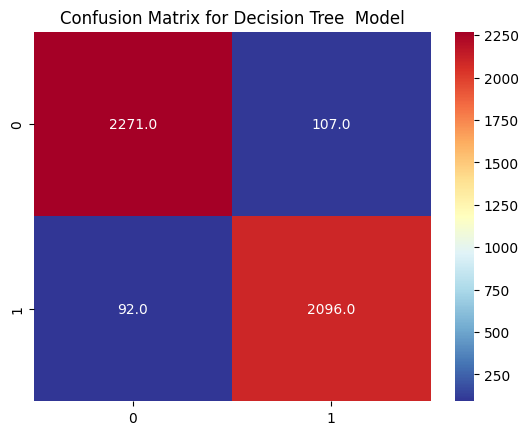

In [144]:
#Evaluation of the model
y_pred = dtc.predict(X_test)
# printing precision, Recall, f1-score
print(classification_report(y_test, predicted))
# Confusion matrix
cm = metrics.confusion_matrix( y_test,predicted)
# Printing Accuracy of the model
print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
# Plotting Confusion matrix Heatmap using sns
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="RdYlBu_r")
plt.title("Confusion Matrix for Decision Tree  Model")

In [145]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test, y_test)

0.9599211563731932

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2378
           1       0.96      0.96      0.96      2188

    accuracy                           0.96      4566
   macro avg       0.96      0.96      0.96      4566
weighted avg       0.96      0.96      0.96      4566

Accuracy of the Model: 95.99211563731932%



Text(0.5, 1.0, 'Confusion Matrix for Random Forest  Model')

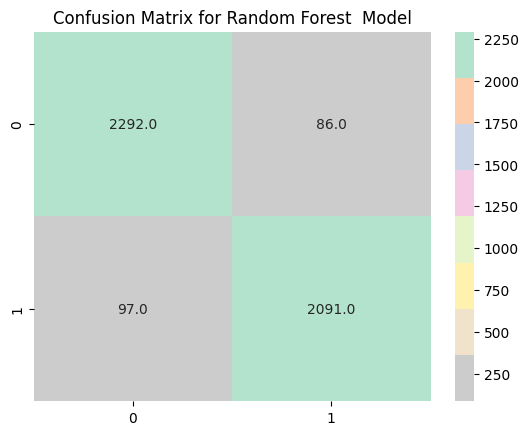

In [146]:
#Evaluation of the model
predicted = rf.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test, predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Pastel2_r")
plt.title("Confusion Matrix for Random Forest  Model")

In [147]:
# Importing
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_test, y_test)

0.9581690757774858

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2378
           1       0.95      0.96      0.96      2188

    accuracy                           0.96      4566
   macro avg       0.96      0.96      0.96      4566
weighted avg       0.96      0.96      0.96      4566

Accuracy of the Model: 95.81690757774858%



Text(0.5, 1.0, 'Confusion Matrix for XGBoost  Model')

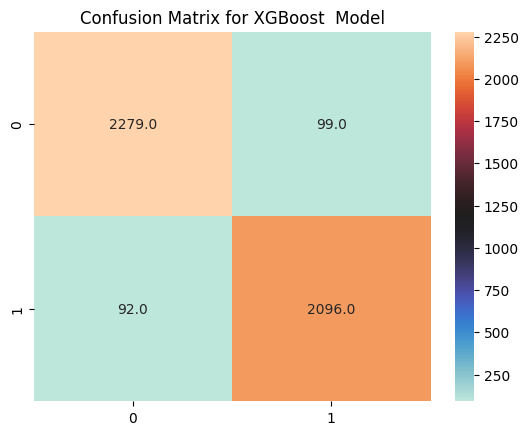

In [148]:
#Evaluation of the model
predicted = xgb.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test, predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="icefire")
plt.title("Confusion Matrix for XGBoost  Model")

In [149]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9568550153307052

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2378
           1       0.95      0.96      0.96      2188

    accuracy                           0.96      4566
   macro avg       0.96      0.96      0.96      4566
weighted avg       0.96      0.96      0.96      4566

Accuracy of the Model: 95.68550153307052%



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Model')

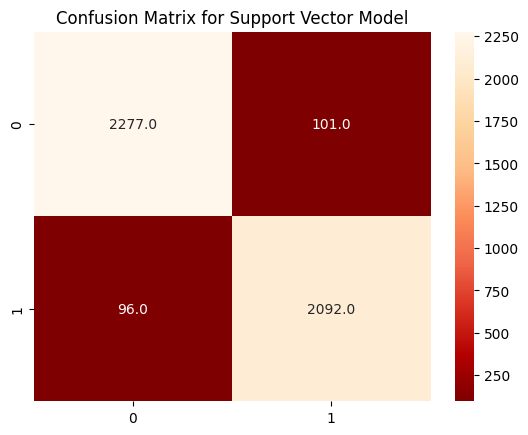

In [150]:
predicted = svc.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="OrRd_r")
plt.title("Confusion Matrix for Support Vector Model")

# Hyperparameter Tuning

In [151]:
# importing warnings library to avoid unnecessary warnings.
import warnings
warnings.filterwarnings('ignore')

In [152]:
# Hyperparameter Tuning
param_grid = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              }
xg_model_gridcv = GridSearchCV(estimator=xgb,
                       param_grid = param_grid,
                       cv = 5, verbose=2)
xg_model_gridcv.fit(X_train,y_train)

xg_model_gridcv = GridSearchCV(estimator=xgb,
                       param_grid = param_grid,
                       cv = 5, verbose=2)
xg_model_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .......................max_depth=6, n_estimators=50; total time=  12.3s
[CV] END .......................max_depth=6, n_estimators=50; total time=   1.8s
[CV] END .......................max_depth=6, n_estimators=50; total time=   1.8s
[CV] END .......................max_depth=6, n_estimators=50; total time=   1.8s
[CV] END .......................max_depth=6, n_estimators=50; total time=   1.8s
[CV] END .......................max_depth=6, n_estimators=80; total time=   4.7s
[CV] END .......................max_depth=6, n_estimators=80; total time=   2.8s
[CV] END .......................max_depth=6, n_estimators=80; total time=   2.8s
[CV] END .......................max_depth=6, n_estimators=80; total time=   2.8s
[CV] END .......................max_depth=6, n_estimators=80; total time=   4.6s
[CV] END ......................max_depth=6, n_estimators=100; total time=   3.5s
[CV] END ......................max_depth=6, n_es

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [153]:
xg_model_gridcv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [154]:
xg_model_gridcv_best = xg_model_gridcv.best_estimator_

In [155]:
predicted = xg_model_gridcv_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2378
           1       0.95      0.96      0.96      2188

    accuracy                           0.96      4566
   macro avg       0.96      0.96      0.96      4566
weighted avg       0.96      0.96      0.96      4566

Accuracy of the Model: 95.86070959264126%



Text(0.5, 1.0, 'Confusion Matrix for XGBoost - GridSearchCV')

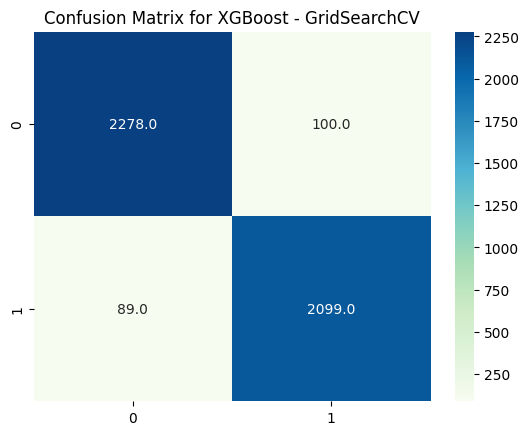

In [156]:
#Evaluation of the model
predicted = xg_model_gridcv_best.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="GnBu")
plt.title("Confusion Matrix for XGBoost - GridSearchCV")

RANDOM FOREST GRIDSEARCH CV

In [157]:
rf_gridcv = GridSearchCV(estimator=rf,
                       param_grid = param_grid,
                       cv = 5, verbose=2)

#Evaluating the optimal parameters
rf_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .......................max_depth=6, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=50; total time=   0.3s
[CV] END .......................max_depth=6, n_estimators=80; total time=   0.5s
[CV] END .......................max_depth=6, n_estimators=80; total time=   0.6s
[CV] END .......................max_depth=6, n_estimators=80; total time=   0.7s
[CV] END .......................max_depth=6, n_estimators=80; total time=   0.7s
[CV] END .......................max_depth=6, n_estimators=80; total time=   0.7s
[CV] END ......................max_depth=6, n_estimators=100; total time=   0.7s
[CV] END ......................max_depth=6, n_es

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [158]:
rf_gridcv.best_params_

{'max_depth': 12, 'n_estimators': 80}

In [160]:
rf_gridcv_best = rf_gridcv.best_estimator_

In [161]:
y_pred =rf_gridcv_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2378
           1       0.96      0.95      0.96      2188

    accuracy                           0.96      4566
   macro avg       0.96      0.96      0.96      4566
weighted avg       0.96      0.96      0.96      4566

Accuracy of the Model: 96.01401664476566%



Text(0.5, 1.0, 'Confusion Matrix for Random Forest - GridSearchCV')

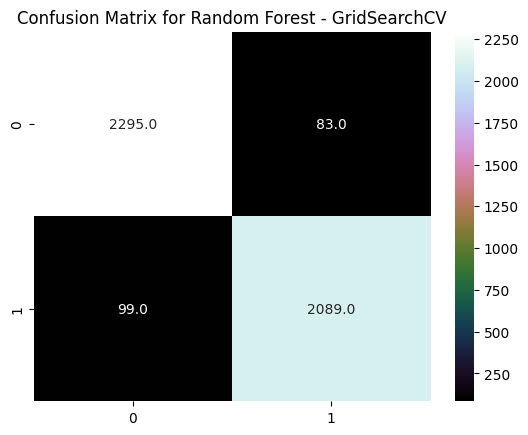

In [162]:
#Evaluation of the model
predicted = rf_gridcv_best.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cubehelix")
plt.title("Confusion Matrix for Random Forest - GridSearchCV")

Text(0.5, 0, 'Model name')

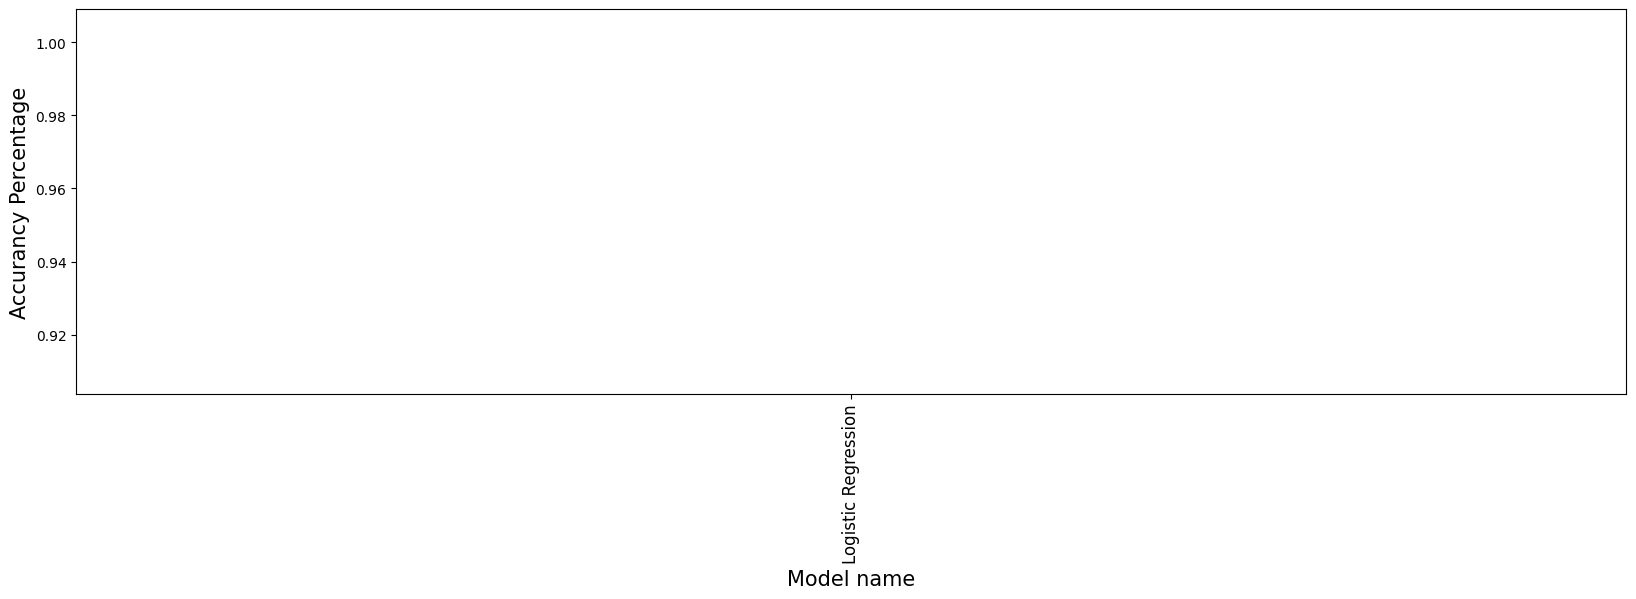

In [163]:
# plot for algorithm comparison
name = list(metrics_df['MODEL NAME'])
result = list(metrics_df['ACCURACY'])

plt.subplots(figsize=(20,5))
plt.plot(name , result)
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Accurancy Percentage',fontsize = 15)
plt.xlabel('Model name',fontsize = 15)

In [165]:
metrics_df=add_metrics_details("XGBoost - GridSearchCV",y_test,predicted,metrics_df)

In [166]:
metrics_df=add_metrics_details("Random Forest - GridSearchCV",y_test,predicted,metrics_df)

In [167]:
# Using function to add the result in metrics_df
metrics_df=add_metrics_details("Logistic Regression",y_test,predicted,metrics_df)

In [168]:
# Using function to add the result in metrics_df
metrics_df=add_metrics_details("Decision Tree",y_test,predicted,metrics_df)

In [170]:
metrics_df=add_metrics_details("Random Forest",y_test,predicted,metrics_df)

In [173]:
#printing the model accuracy dataframe
metrics_df

,MODEL NAME,ACCURACY,RECALL,PRECISION,F1-SCORE,ROC AUC SCORE
0,Logistic Regression,0.956417,0.957952,0.951430,0.954680,0.956478
1,XGBoost - GridSearchCV,0.960140,0.954753,0.961786,0.958257,0.959925
2,Random Forest - GridSearchCV,0.960140,0.954753,0.961786,0.958257,0.959925
3,Logistic Regression,0.960140,0.954753,0.961786,0.958257,0.959925
4,Decision Tree,0.960140,0.954753,0.961786,0.958257,0.959925
5,Light GBM,0.960140,0.954753,0.961786,0.958257,0.959925
6,Random Forest,0.960140,0.954753,0.961786,0.958257,0.959925
7,Support Vector Machine,0.960140,0.954753,0.961786,0.958257,0.959925




#### **EDA CONCLUSION :**

*   The overall rating for the 'Economy class' cabin type is favourable. As a result, it is recommended.
*  The Target column 'recommended' gives the insight of balanced data.
* The majority of airline passengers fall under the category of "solo leisure", followed by "couple leisure".
* The majority of reviewers are from the Economy Class cabin type.
* American Airlines get most reviews followed by United Airlines and British Airways.

#### **MODEL CONCLUSION :**
* Metrics like accuracy, precision, recall are good ways to evaluate classification models for balanced datasets. We will use Accuracy Since the accuracy model is easy to understand and use.
* ROC - AUC score is good for imbalanced data, but since there is no imbalance
we can use accuracy as metric.
* The best outcome is produced by XGBoost- GridsearchCV, followed by XGBoost and Randomforest- GridsearchCV.